In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [88]:
df = pd.read_csv("../datasets/WIPRO-imputated.csv")

(18, 82)

In [100]:
df = pd.read_csv("../datasets/HCLTECH.csv")

(18, 82)

In [112]:
df = pd.read_csv("../datasets/INFY.csv")

In [2]:
df = pd.read_csv("../datasets/TCS.csv")

In [3]:
df = df.set_index(df.columns[0])
df.shape

(18, 82)

In [4]:
closing_prices = df.iloc[0, 1:].values.astype(float)

scaler = MinMaxScaler(feature_range=(0, 1))
closing_prices_scaled = scaler.fit_transform(closing_prices.reshape(-1, 1))

In [5]:
def create_dataset(df, look_back=10):
    X, Y = [], []
    for i in range(len(df) - look_back):
        X.append(df[i:i + look_back, 0])
        Y.append(df[i + look_back, 0])
    print(len(X))
    print(len(Y))
    return np.array(X), np.array(Y)

In [6]:
look_back = 20
X, Y = create_dataset(closing_prices_scaled, look_back)

X = np.reshape(X, (X.shape[0], X.shape[1], 1))

61
61


In [7]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 20, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31901 (124.61 KB)
Trainable params: 31901 (124.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
model.fit(X, Y, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
61/61 - 5s - loss: 0.0380 - 5s/epoch - 80ms/step
Epoch 2/100
61/61 - 1s - loss: 0.0209 - 668ms/epoch - 11ms/step
Epoch 3/100
61/61 - 1s - loss: 0.0106 - 587ms/epoch - 10ms/step
Epoch 4/100
61/61 - 1s - loss: 0.0080 - 644ms/epoch - 11ms/step
Epoch 5/100
61/61 - 1s - loss: 0.0115 - 578ms/epoch - 9ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0079 - 433ms/epoch - 7ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0093 - 402ms/epoch - 7ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0105 - 401ms/epoch - 7ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0108 - 395ms/epoch - 6ms/step
Epoch 10/100
61/61 - 1s - loss: 0.0092 - 508ms/epoch - 8ms/step
Epoch 11/100
61/61 - 1s - loss: 0.0081 - 545ms/epoch - 9ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0089 - 421ms/epoch - 7ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0079 - 397ms/epoch - 7ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0094 - 405ms/epoch - 7ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0073 - 395ms/epoch - 6ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0097 - 491ms/e

In [10]:
predicted_closing_prices_scaled = model.predict(X)

2/2 [==============================] - 1s 9ms/step


In [11]:
predicted_closing_prices = scaler.inverse_transform(predicted_closing_prices_scaled)
actual_closing_prices = scaler.inverse_transform(closing_prices_scaled[look_back:])

In [12]:
future_steps = 10
last_sequence = closing_prices_scaled[-look_back:]

In [13]:
future_predictions = []
for _ in range(future_steps):
    next_pred = model.predict(last_sequence.reshape(1, look_back, 1))
    future_predictions.append(next_pred[0, 0])
    last_sequence = np.append(last_sequence[1:], next_pred)[-look_back:].reshape(look_back, 1)

future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

1/1 [==============================] - 0s 34ms/step


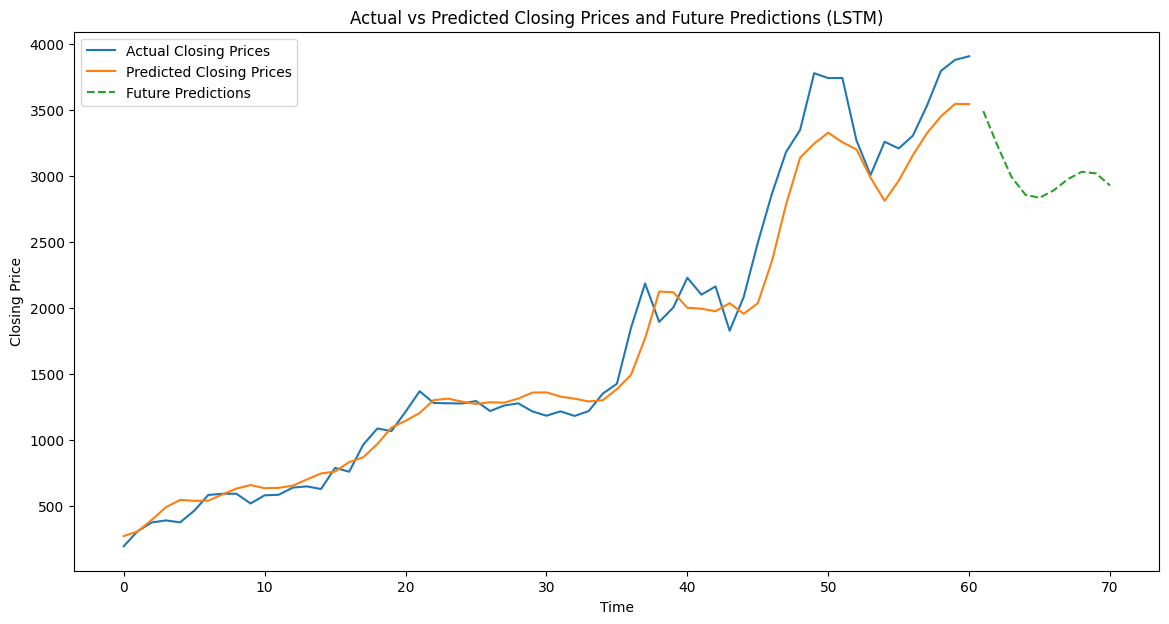

In [14]:
plt.figure(figsize=(14, 7))
plt.plot(actual_closing_prices, label='Actual Closing Prices')
plt.plot(predicted_closing_prices, label='Predicted Closing Prices')
plt.plot(np.arange(len(actual_closing_prices), len(actual_closing_prices) + future_steps), future_predictions, label='Future Predictions', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.title('Actual vs Predicted Closing Prices and Future Predictions (LSTM)')
plt.legend()
plt.show()

In [15]:
mse = mean_squared_error(actual_closing_prices, predicted_closing_prices)
mae = mean_absolute_error(actual_closing_prices, predicted_closing_prices)
r2 = r2_score(actual_closing_prices, predicted_closing_prices)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")

MSE: 46459.67130190647
MAE: 157.97589086313718
R-squared: 0.9634122897750409


Epoch 1/100
61/61 - 5s - loss: 0.0461 - 5s/epoch - 80ms/step
Epoch 2/100
61/61 - 1s - loss: 0.0113 - 622ms/epoch - 10ms/step
Epoch 3/100
61/61 - 1s - loss: 0.0090 - 562ms/epoch - 9ms/step
Epoch 4/100
61/61 - 1s - loss: 0.0100 - 583ms/epoch - 10ms/step
Epoch 5/100
61/61 - 1s - loss: 0.0102 - 636ms/epoch - 10ms/step
Epoch 6/100
61/61 - 1s - loss: 0.0275 - 604ms/epoch - 10ms/step
Epoch 7/100
61/61 - 1s - loss: 0.0133 - 633ms/epoch - 10ms/step
Epoch 8/100
61/61 - 1s - loss: 0.0085 - 632ms/epoch - 10ms/step
Epoch 9/100
61/61 - 1s - loss: 0.0083 - 628ms/epoch - 10ms/step
Epoch 10/100
61/61 - 1s - loss: 0.0079 - 662ms/epoch - 11ms/step
Epoch 11/100
61/61 - 1s - loss: 0.0087 - 640ms/epoch - 10ms/step
Epoch 12/100
61/61 - 1s - loss: 0.0089 - 562ms/epoch - 9ms/step
Epoch 13/100
61/61 - 1s - loss: 0.0070 - 516ms/epoch - 8ms/step
Epoch 14/100
61/61 - 1s - loss: 0.0081 - 518ms/epoch - 8ms/step
Epoch 15/100
61/61 - 1s - loss: 0.0074 - 514ms/epoch - 8ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0085 - 4

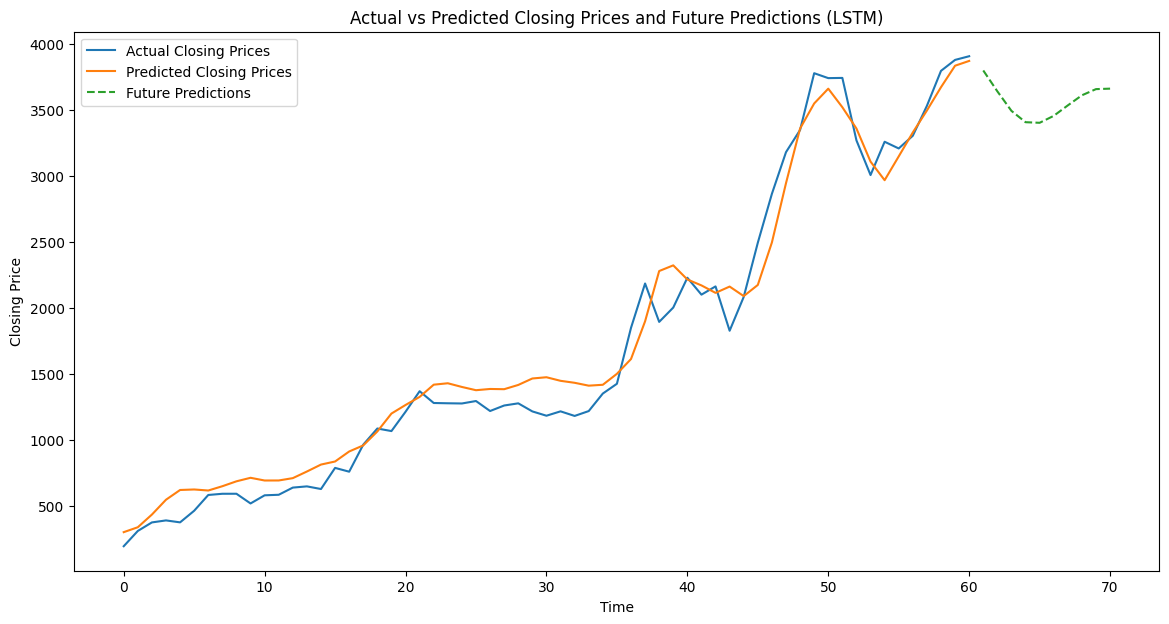

MSE: 29093.118661294317
MAE: 138.28600699002627
R-squared: 0.9770887187685268


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load and prepare the data
df = pd.read_csv("../datasets/TCS.csv")
df = df.set_index(df.columns[0])
closing_prices = df.iloc[0, 1:].values.astype(float)

# Scale the closing prices
scaler = MinMaxScaler(feature_range=(0, 1))
closing_prices_scaled = scaler.fit_transform(closing_prices.reshape(-1, 1))

def create_dataset(df, look_back=10):
    X, Y = [], []
    for i in range(len(df) - look_back):
        X.append(df[i:i + look_back, 0])
        Y.append(df[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 20
X, Y = create_dataset(closing_prices_scaled, look_back)

# Reshape for LSTM [samples, timesteps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Build and train the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, Y, epochs=100, batch_size=1, verbose=2)

# Predict on the training data
predicted_closing_prices_scaled = model.predict(X)

# Inverse transform the predictions and actual values
predicted_closing_prices = scaler.inverse_transform(predicted_closing_prices_scaled)
actual_closing_prices = scaler.inverse_transform(closing_prices_scaled[look_back:])

# Predict future values
future_steps = 10
last_sequence = closing_prices_scaled[-look_back:]
future_predictions = []
for _ in range(future_steps):
    next_pred = model.predict(last_sequence.reshape(1, look_back, 1))
    future_predictions.append(next_pred[0, 0])
    last_sequence = np.append(last_sequence[1:], next_pred)[-look_back:].reshape(look_back, 1)

future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(range(len(actual_closing_prices)), actual_closing_prices, label='Actual Closing Prices')
plt.plot(range(len(predicted_closing_prices)), predicted_closing_prices, label='Predicted Closing Prices')
plt.plot(range(len(actual_closing_prices), len(actual_closing_prices) + future_steps), future_predictions, label='Future Predictions', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.title('Actual vs Predicted Closing Prices and Future Predictions (LSTM)')
plt.legend()
plt.show()

# Evaluate the model
mse = mean_squared_error(actual_closing_prices, predicted_closing_prices)
mae = mean_absolute_error(actual_closing_prices, predicted_closing_prices)
r2 = r2_score(actual_closing_prices, predicted_closing_prices)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")


Epoch 1/100
61/61 - 5s - loss: 0.0276 - 5s/epoch - 80ms/step
Epoch 2/100
61/61 - 1s - loss: 0.0131 - 603ms/epoch - 10ms/step
Epoch 3/100
61/61 - 1s - loss: 0.0101 - 604ms/epoch - 10ms/step
Epoch 4/100
61/61 - 1s - loss: 0.0116 - 627ms/epoch - 10ms/step
Epoch 5/100
61/61 - 1s - loss: 0.0096 - 708ms/epoch - 12ms/step
Epoch 6/100
61/61 - 1s - loss: 0.0097 - 616ms/epoch - 10ms/step
Epoch 7/100
61/61 - 1s - loss: 0.0099 - 565ms/epoch - 9ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0126 - 480ms/epoch - 8ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0104 - 491ms/epoch - 8ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0080 - 494ms/epoch - 8ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0080 - 498ms/epoch - 8ms/step
Epoch 12/100
61/61 - 1s - loss: 0.0080 - 503ms/epoch - 8ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0083 - 497ms/epoch - 8ms/step
Epoch 14/100
61/61 - 1s - loss: 0.0097 - 507ms/epoch - 8ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0095 - 494ms/epoch - 8ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0104 - 497ms

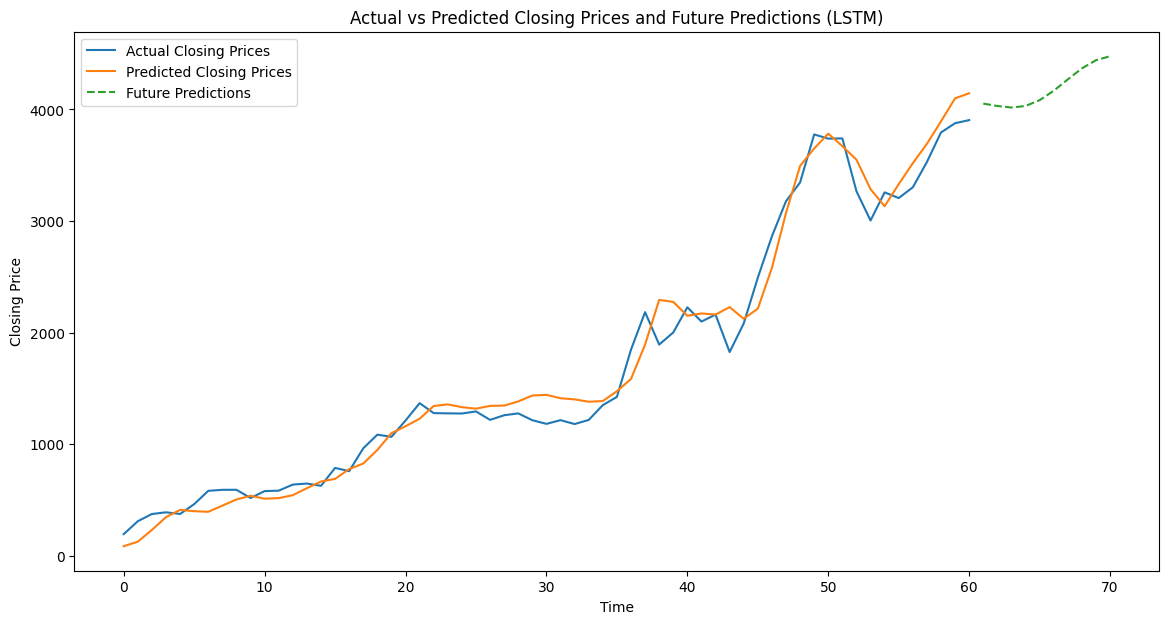

MSE (scaled data): 0.001876557761826529
MAE (scaled data): 0.03546795197632701


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load and prepare the data
df = pd.read_csv("../datasets/TCS.csv")
df = df.set_index(df.columns[0])
closing_prices = df.iloc[0, 1:].values.astype(float)

# Scale the closing prices
scaler = MinMaxScaler(feature_range=(0, 1))
closing_prices_scaled = scaler.fit_transform(closing_prices.reshape(-1, 1))

def create_dataset(df, look_back=10):
    X, Y = [], []
    for i in range(len(df) - look_back):
        X.append(df[i:i + look_back, 0])
        Y.append(df[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 20
X, Y = create_dataset(closing_prices_scaled, look_back)

# Reshape for LSTM [samples, timesteps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Build and train the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, Y, epochs=100, batch_size=1, verbose=2)

# Predict on the scaled data
predicted_closing_prices_scaled = model.predict(X)

# Calculate MSE and MAE for the scaled data
mse_scaled = mean_squared_error(Y, predicted_closing_prices_scaled)
mae_scaled = mean_absolute_error(Y, predicted_closing_prices_scaled)

# Inverse transform the predictions and actual values for plotting
predicted_closing_prices = scaler.inverse_transform(predicted_closing_prices_scaled)
actual_closing_prices = scaler.inverse_transform(closing_prices_scaled[look_back:])

# Predict future values
future_steps = 10
last_sequence = closing_prices_scaled[-look_back:]
future_predictions = []
for _ in range(future_steps):
    next_pred = model.predict(last_sequence.reshape(1, look_back, 1))
    future_predictions.append(next_pred[0, 0])
    last_sequence = np.append(last_sequence[1:], next_pred)[-look_back:].reshape(look_back, 1)

future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(range(len(actual_closing_prices)), actual_closing_prices, label='Actual Closing Prices')
plt.plot(range(len(predicted_closing_prices)), predicted_closing_prices, label='Predicted Closing Prices')
plt.plot(range(len(actual_closing_prices), len(actual_closing_prices) + future_steps), future_predictions, label='Future Predictions', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.title('Actual vs Predicted Closing Prices and Future Predictions (LSTM)')
plt.legend()
plt.show()

print(f"MSE (scaled data): {mse_scaled}")
print(f"MAE (scaled data): {mae_scaled}")
